# Bitcoin price prediction using Linear Regression 

Importing libraries

In [123]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import pickle

Getting the data in real-time each day

In [124]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])

The data in dataframe

In [125]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1465344000,582.44,567.78,575.58,49604.16,2.870622e+07,580.51,direct,
1,1465430400,580.71,569.26,580.51,48613.35,2.801058e+07,574.69,direct,
2,1465516800,579.26,571.14,574.69,45501.86,2.629087e+07,577.89,direct,
3,1465603200,592.61,576.29,577.89,42217.02,2.479044e+07,591.60,direct,
4,1465689600,683.85,592.79,591.60,217379.53,1.396846e+08,666.55,direct,
...,...,...,...,...,...,...,...,...,...
1996,1637798400,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99,direct,
1997,1637884800,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22,direct,
1998,1637971200,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03,direct,
1999,1638057600,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41,direct,


changing the date format

In [126]:
df.index = pd.to_datetime(df.index, unit='s')

In [127]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
1970-01-01 00:00:00,1465344000,582.44,567.78,575.58,49604.16,2.870622e+07,580.51,direct,
1970-01-01 00:00:01,1465430400,580.71,569.26,580.51,48613.35,2.801058e+07,574.69,direct,
1970-01-01 00:00:02,1465516800,579.26,571.14,574.69,45501.86,2.629087e+07,577.89,direct,
1970-01-01 00:00:03,1465603200,592.61,576.29,577.89,42217.02,2.479044e+07,591.60,direct,
1970-01-01 00:00:04,1465689600,683.85,592.79,591.60,217379.53,1.396846e+08,666.55,direct,
...,...,...,...,...,...,...,...,...,...
1970-01-01 00:33:16,1637798400,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99,direct,
1970-01-01 00:33:17,1637884800,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22,direct,
1970-01-01 00:33:18,1637971200,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03,direct,
1970-01-01 00:33:19,1638057600,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41,direct,


dropping the irelevent columns like conversion type and conversion symbol

In [128]:
df = df.drop(['conversionType', 'conversionSymbol'], axis = 1)

dropping the time column which does not have effect on the prices columns

In [129]:
df = df.drop('time', axis = 1)

In [130]:
df.head()

,high,low,open,volumefrom,volumeto,close
1970-01-01 00:00:00,582.44,567.78,575.58,49604.16,2.870622e+07,580.51
1970-01-01 00:00:01,580.71,569.26,580.51,48613.35,2.801058e+07,574.69
1970-01-01 00:00:02,579.26,571.14,574.69,45501.86,2.629087e+07,577.89
1970-01-01 00:00:03,592.61,576.29,577.89,42217.02,2.479044e+07,591.60
1970-01-01 00:00:04,683.85,592.79,591.60,217379.53,1.396846e+08,666.55


In [131]:
df.tail()

,high,low,open,volumefrom,volumeto,close
1970-01-01 00:33:16,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99
1970-01-01 00:33:17,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22
1970-01-01 00:33:18,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03
1970-01-01 00:33:19,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41
1970-01-01 00:33:20,58267.05,57198.89,57331.41,6124.68,3.531398e+08,57338.80


Splitting the test data as last 30 days data

In [132]:
test_df = df[-30:]

In [133]:
X_test = test_df.iloc[:, [0, 1, 2, 3, 4]].values
y_test = test_df.iloc[:, [5]].values

Splitting the train data

In [134]:
train_df = df[:len(df)-30]

In [135]:
X = train_df.iloc[:, [0, 1, 2, 3, 4]].values
y = train_df.iloc[:, [5]].values

Splitting the train dataset into training and validation set

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Making the model

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Saving the model

In [138]:
# save the model to disk
filename = 'finalized_linear_regression_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

prediction using the validation data

In [139]:
#validation data prediction
y_val_prediction = regressor.predict(X_val)


In [140]:
#training accuracy

lin_regression_confidence = regressor.score(X_val, y_val)
print("linear regression validation accuracy: ", lin_regression_confidence)

linear regression validation accuracy:  0.9993960565068991


In [141]:
#training data prediction
y_train_prediction = regressor.predict(X_train)

In [142]:
#training accuracy

lin_regression_confidence = regressor.score(X_train, y_train)
print("linear regression validation accuracy: ", lin_regression_confidence)

linear regression validation accuracy:  0.9994919272031103


Line Plot for actual and predicted price

In [143]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

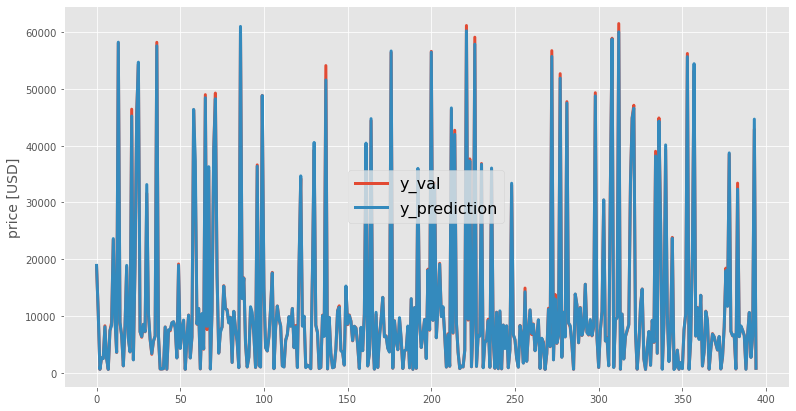

In [144]:
line_plot(y_val, y_val_prediction, 'y_val', 'y_prediction', lw=3)

predicting through test data

In [145]:
y_prediction = regressor.predict(X_test)


In [146]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[60757.50084418 61349.75      ]
 [60876.85274903 60960.98      ]
 [63401.50537956 63260.05      ]
 [61780.80261359 62929.93      ]
 [61306.70969612 61448.47      ]
 [61709.03976465 61019.66      ]
 [60583.47451202 61529.76      ]
 [62620.69941542 63302.78      ]
 [66908.21354729 67549.14      ]
 [67320.10923977 66939.24      ]
 [66006.23623687 64926.06      ]
 [64659.64424552 64820.8       ]
 [63441.17890242 64156.3       ]
 [63973.46615666 64409.56      ]
 [64450.54966864 65509.06      ]
 [64519.84019687 63614.06      ]
 [60280.78775515 60108.9       ]
 [59572.9219239  60365.6       ]
 [58273.17033886 56930.68      ]
 [57154.80342484 58136.22      ]
 [58853.77795757 59769.66      ]
 [58885.74740365 58700.83      ]
 [57074.40863204 56303.06      ]
 [56939.4441363  57566.6       ]
 [56373.26382866 57175.09      ]
 [58765.2969741  58966.99      ]
 [55432.65003761 53788.22      ]
 [54741.27932098 54805.03      ]
 [55842.62522232 57331.41      ]
 [57670.19970746 57338.8       ]]


In [147]:
from sklearn.metrics import max_error

mre = max_error(y_test, y_prediction)
print("Maximum Residual Error :", mre)

Maximum Residual Error : 1644.4300376122847


In [148]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute Error :", mae)

Mean absolute Error : 670.8253184311594


In [149]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
print("Mean Squered Error :", mse)
print("Root Mean Squered Error :",rmse)

Mean Squered Error : 631607.8020699061
Root Mean Squered Error : 794.7375680499231


In [150]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_prediction)
print("Mean absolute percentage error : ", mape)

Mean absolute percentage error :  0.011145119475218391


In [151]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print("R2 error", r2)

R2 error 0.9492633728754551


In [152]:
#display adjusted R-squared
adjecent_r2 = 1 - (1-regressor.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adjecent R2 error", adjecent_r2)

adjecent R2 error 0.9386932422245083


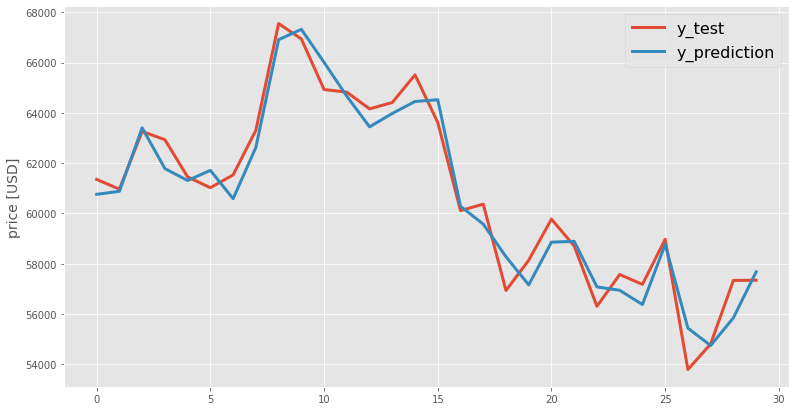

In [153]:
line_plot(y_test, y_prediction, 'y_test', 'y_prediction', lw=3)